In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv('cats_vs_dogs.csv')
df.describe()

,Unnamed: 0,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,2403.897959,56.859184,1342.591837,36.973469,876.367347,1.587755,1414.163265,31.642857,728.061224,2.040816,1492.795918
std,14.28869,2514.054786,6.931688,1358.247246,6.671169,891.828475,0.202724,1464.658882,5.683162,717.293362,0.191397,1459.857969
min,1.00000,221.000000,21.900000,63.000000,13.100000,38.000000,1.100000,42.000000,11.600000,33.000000,1.700000,63.000000
25%,13.00000,765.000000,53.600000,475.000000,32.900000,273.000000,1.400000,410.000000,29.000000,247.000000,1.900000,514.000000
50%,25.00000,1759.000000,56.800000,957.000000,36.600000,638.000000,1.600000,1097.000000,31.300000,501.000000,2.000000,1185.000000
75%,37.00000,2632.000000,61.300000,1611.000000,42.500000,1069.000000,1.700000,1798.000000,33.800000,876.000000,2.200000,1844.000000
max,49.00000,12974.000000,70.800000,6865.000000,47.900000,4260.000000,2.100000,7163.000000,49.500000,3687.000000,2.600000,7118.000000


In [32]:
n_df=df.drop(columns=['state','Unnamed: 0'])
n_df
# df

,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191
5,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796
6,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
7,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63
8,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375
9,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162


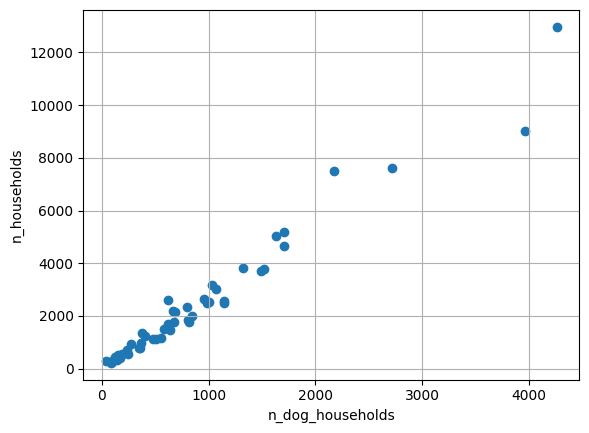

In [20]:
feature1 = 'n_dog_households'
feature2 = 'n_households'
plt.scatter(n_df['n_dog_households'], n_df['n_households'])
plt.xlabel('n_dog_households')
plt.ylabel('n_households')
plt.grid()

In [34]:
# стандартизуем данные,если надо 
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
norm.fit(n_df)
X = norm.transform(n_df)

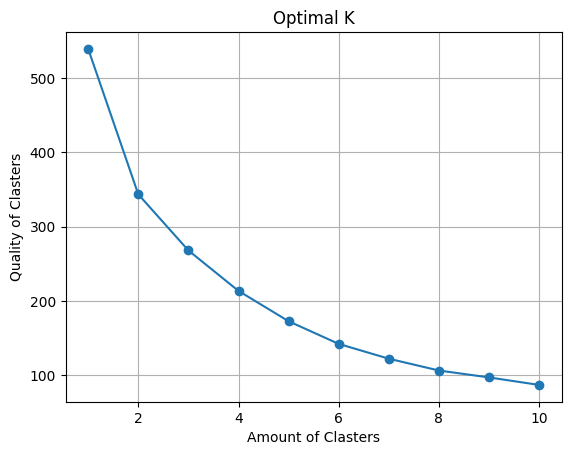

In [42]:
K = range(1,11)
# models = [KMeans(n_clusters=k,random_state=42,n_init=10,verbose=0).fit(n_df) for k in K]
# для стандартизированных данных ниже
models = [KMeans(n_clusters=k,random_state=42,n_init=10,verbose=0).fit(X) for k in K]

dist = [model.inertia_ for model in models]
plt.plot(K,dist,marker='o')
plt.xlabel('Amount of Clasters')
plt.ylabel('Quality of Clasters')
plt.title('Optimal K')
plt.grid()

In [44]:
model = KMeans(n_clusters = 2,random_state=42,max_iter=300,n_init=10,verbose=0)
model.fit(n_df)
n_df['cluster'] = model.labels_
n_df.groupby('cluster').mean()

,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
cluster,,,,,,,,,,,
0,1567.500000,57.228571,892.761905,37.340476,590.238095,1.592857,966.666667,32.002381,489.380952,2.038095,1001.071429
1,7422.285714,54.642857,4041.571429,34.771429,2593.142857,1.557143,4099.142857,29.485714,2160.142857,2.057143,4443.142857
